<a href="https://colab.research.google.com/github/mariaulia/2025_VISI-KOMPUTER/blob/main/JOBSHEET_3__PENUGASAN_2_Pawpularity_%E2%80%93_Prediksi_Tingkat_Kepopuleran_Hewan_Peliharaan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PENUGASAN 2

In [1]:
from google.colab import files
files.upload()  # upload file kaggle.json kamu dari laptop

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mariaaulia","key":"4317ac2f855c4c1bfda59e7b47e4eaff"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c petfinder-pawpularity-score

 99% 970M/983M [00:04<00:00, 250MB/s]
100% 983M/983M [00:04<00:00, 233MB/s]


In [4]:
!unzip petfinder-pawpularity-score.zip -d pawpularity_data

Streaming output truncated to the last 5000 lines.
  inflating: pawpularity_data/train/7e3d6d03218db540c6125630572aa7cd.jpg  
  inflating: pawpularity_data/train/7e51d9305ec464c1f77cfee35ceb1b4f.jpg  
  inflating: pawpularity_data/train/7e56aa71d1e091e004703283323e8e7f.jpg  
  inflating: pawpularity_data/train/7e5d1650d5cda4d68f2ee8ce17c29b25.jpg  
  inflating: pawpularity_data/train/7e601feb12f2fb03c2d342e54cd47b1e.jpg  
  inflating: pawpularity_data/train/7e6ca633d2a751af58e1cc220ca519b3.jpg  
  inflating: pawpularity_data/train/7e717923c22053e51861a24aae701fb0.jpg  
  inflating: pawpularity_data/train/7e761f47cc1e3038a431f9f196234ab9.jpg  
  inflating: pawpularity_data/train/7e7921ed945c3c863882340360c9157d.jpg  
  inflating: pawpularity_data/train/7e8763e28a01c059b7a8d119c5ae0dc0.jpg  
  inflating: pawpularity_data/train/7e93691bef9bc381590cf004358ee11a.jpg  
  inflating: pawpularity_data/train/7e947e83394b6d74f1ec4f5b596bed6a.jpg  
  inflating: pawpularity_data/train/7e9d46bd87849

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [6]:
train_df = pd.read_csv("/content/pawpularity_data/train.csv")
print("Jumlah data:", len(train_df))
train_df.head()

Jumlah data: 9912


,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


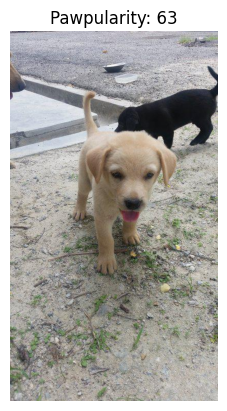

In [7]:
import os
img_dir = "/content/pawpularity_data/train"
sample_img = os.path.join(img_dir, train_df['Id'][0] + ".jpg")
plt.imshow(image.load_img(sample_img))
plt.title(f"Pawpularity: {train_df['Pawpularity'][0]}")
plt.axis('off')
plt.show()

In [8]:
def load_image(img_id):
    path = os.path.join(img_dir, img_id + ".jpg")
    img = image.load_img(path, target_size=(128, 128))
    img = image.img_to_array(img) / 255.0
    return img

images = np.array([load_image(id) for id in train_df['Id'][:2000]])  # ambil 2000 biar cepat
labels = train_df['Pawpularity'][:2000].values

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [9]:
model = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # regresi untuk nilai 0-100
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 361ms/step - loss: 626.5761 - mae: 18.8446 - val_loss: 504.0538 - val_mae: 15.8057
Epoch 2/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 377ms/step - loss: 488.3419 - mae: 16.4024 - val_loss: 566.9598 - val_mae: 19.9697
Epoch 3/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 356ms/step - loss: 467.0183 - mae: 16.5645 - val_loss: 435.5486 - val_mae: 15.9129


In [11]:
model.save("pawpularity_model.h5")

Saving brilly.jpeg to brilly.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Prediksi Pawpularity: 40.49 / 100


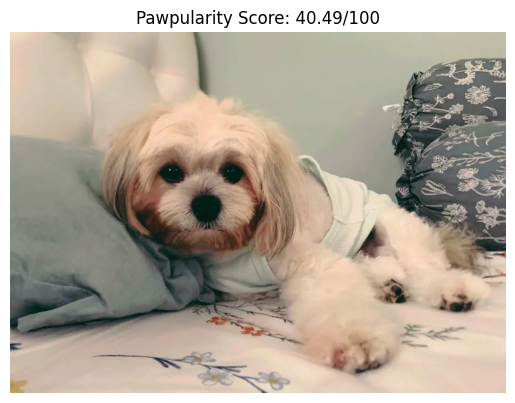

In [12]:
# Upload foto kamu
from google.colab import files
uploaded = files.upload()

# Ganti nama file-nya sesuai hasil upload, misalnya 'foto_kucingku.jpg'
img_path = list(uploaded.keys())[0]

# Prediksi
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)[0][0]
print(f"Prediksi Pawpularity: {pred:.2f} / 100")

plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f"Pawpularity Score: {pred:.2f}/100")
plt.show()